# CollabMP3

### Connecting Spotify

In [41]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

lz_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='2e01fb70abfd40ae8b2a5c6d26b14342',
        client_secret= 'c83aaf8534e5452a9db69971fb83a666',))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:5]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Lost
audio    : https://p.scdn.co/mp3-preview/94ecce736afb1d39b32355dabcbe2680d302c2ae?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b2738542fd936fb29c16b4a9df86

track    : In the End
audio    : https://p.scdn.co/mp3-preview/91f72a7835abc272a11f9e659ef71234bb476000?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b273e2f039481babe23658fc719a

track    : Numb
audio    : https://p.scdn.co/mp3-preview/de3bfecab86ee831098a12e412fa39bd2e9d414b?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b273b4ad7ebaf4575f120eb3f193

track    : What I've Done
audio    : https://p.scdn.co/mp3-preview/6ddd4170ac6d3a034abd3f8a1c31a5f0e6a24a19?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b27346e207de66ba06422897f769

track    : Numb / Encore
audio    : https://p.scdn.co/mp3-preview/1f7814dd953a644eb61be5db2589c27e6e9e361d?cid=2e01fb70abfd40ae8b2a5c6d2

In [42]:
cid = "808325297aab40ae95147c06419ed138"
secret = "0c85b6d7358a4f7194788d0a87ddfb10"
username = "f1ohen1s24fvgko7dz28oazt7"
redirect_uri = "http://localhost:9000"

In [43]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
results = sp.artist_albums(birdy_uri, album_type='album')
# spotify.current_user()

NameError: name 'birdy_uri' is not defined

In [31]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid ="Your-client-ID" 
secret = "Your-client-secret"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#Then run your query
results = sp.artist_albums(birdy_uri, album_type='album')

NameError: name 'birdy_uri' is not defined

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data Processing

In [6]:
data = pd.read_csv("SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [15]:
pd.isnull(data).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Text(0.5, 1.0, 'Correlation')

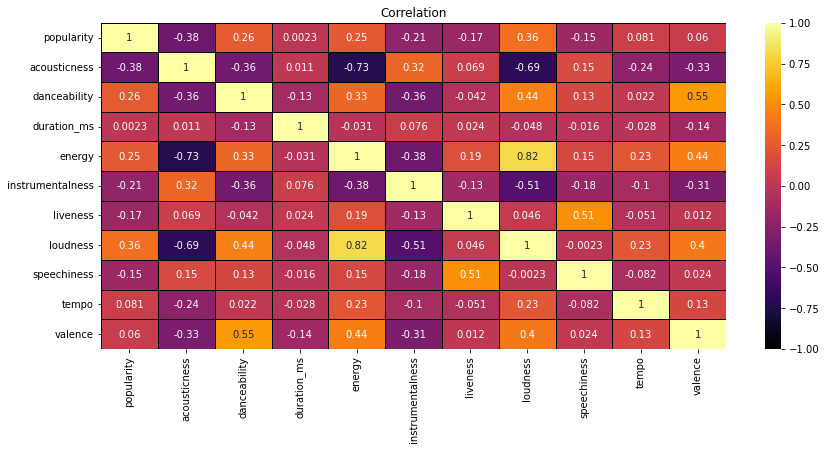

In [17]:
corr = data.corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation")


### Data Visualization

<AxesSubplot:xlabel='energy', ylabel='loudness'>

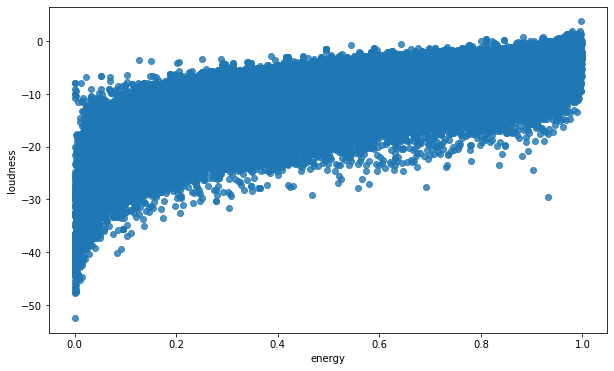

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y="loudness", x="energy")

this is unlcear due to huge dataset, so we need a smaller sample from this

In [184]:
sample = data.sample(int(0.001*len(data)))
print(len(sample))

232


[Text(0.5, 1.0, 'Loudness vs Energy')]

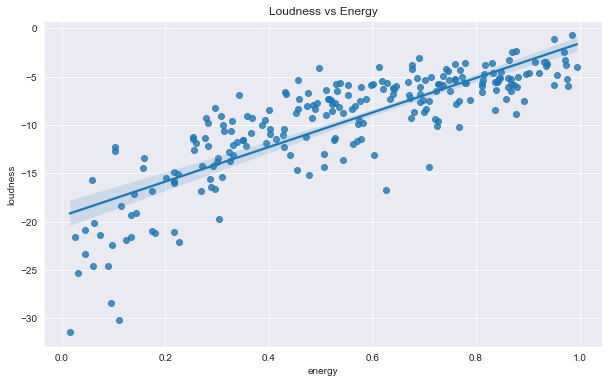

In [187]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample, y="loudness", x="energy").set(title="Loudness vs Energy")

[Text(0.5, 1.0, 'Acousticness vs Energy')]

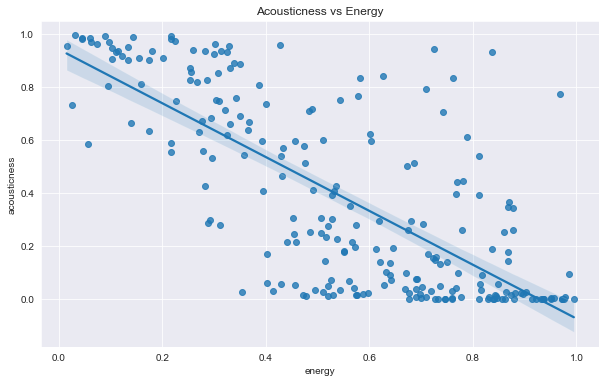

In [186]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")

<AxesSubplot:title={'center':'Duration of Songs'}, xlabel='duration_ms', ylabel='genre'>

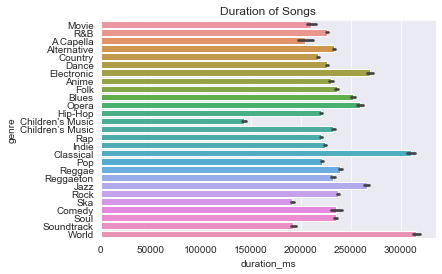

In [22]:
sns.set_style(style="darkgrid")
plt.title("Duration of Songs")
sns.color_palette("rocket", as_cmap = True)
sns.barplot(y="genre", x="duration_ms", data = data)

[Text(0.5, 1.0, 'Top Genres by Popularity')]

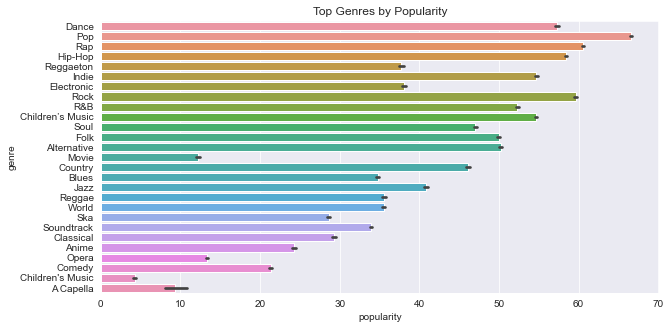

In [160]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous = data.sort_values("popularity", ascending=False)
sns.barplot(y="genre", x="popularity", data = famous).set(title="Top Genres by Popularity")

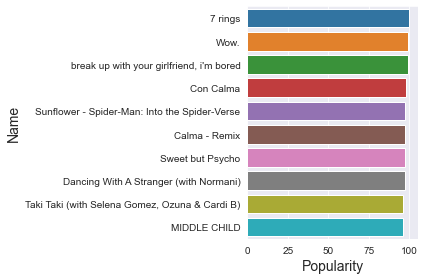

In [164]:
 # top 10 popular songs in the dataset
songs = data.groupby('track_name')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=songs, y=songs.index, orient = 'h')
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.tight_layout()

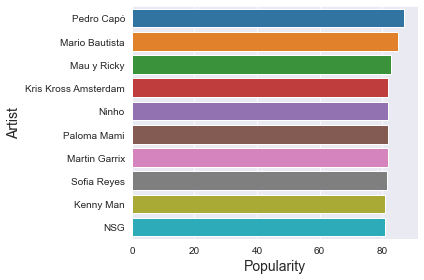

In [166]:
# top 10 popular songs in the dataset
artists = data.groupby('artist_name')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=artists, y=artists.index, orient = 'h')
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.tight_layout()

Mean value of danceability: 0.5543644692233398


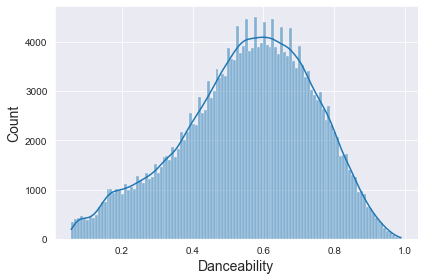

In [168]:
# mean value and histplot for danceability feature
print("Mean value of danceability:", data['danceability'].mean())
sns.histplot(x='danceability', data=data, kde=True)
plt.xlabel('Danceability', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Mean value of energy: 0.57095767347127


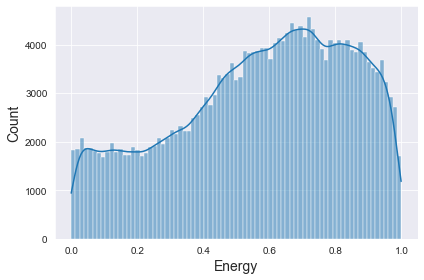

In [170]:
# mean value and histplot for for energy feature
print("Mean value of energy:", data['energy'].mean())
sns.histplot(x='energy', data=data, kde=True)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Mean value of loudness: -9.569885401224399


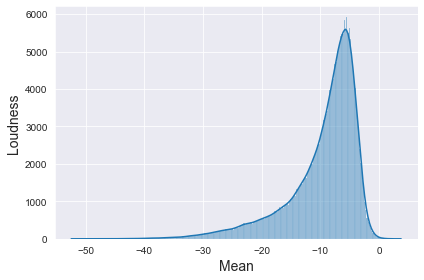

In [171]:
 # mean value and histplot for loudness feature
print("Mean value of loudness:", data['loudness'].mean())
sns.histplot(x='loudness', data=data, kde=True)
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Loudness', fontsize=14)
plt.tight_layout()

Mean value of acousticness: 0.36856045175644825


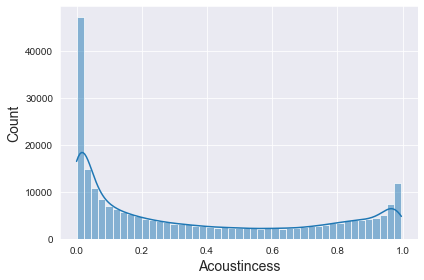

In [173]:
# mean value and histplot for acousticness feature
print("Mean value of acousticness:", data['acousticness'].mean())
sns.histplot(x='acousticness', data=data, kde=True)
plt.xlabel('Acoustincess', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Mean value of instrumentalness: 0.1483012336397001


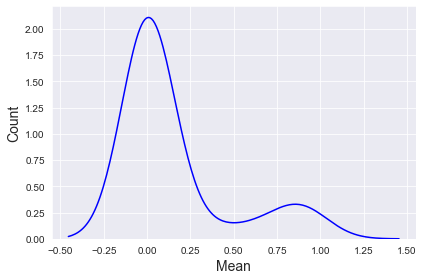

In [175]:
# mean value and histplot for instrumentalness feature
print("Mean value of instrumentalness:", data['instrumentalness'].mean())
sns.kdeplot(np.array(data['instrumentalness']), color='b', bw_method=0.5, label='keyword')
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Mean value of liveness: 0.21500928452036241


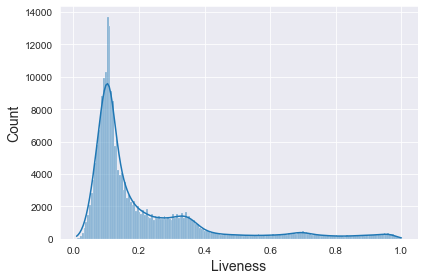

In [176]:
# mean value and histplot for valence feature
print('Mean value of liveness:', data['liveness'].mean())
sns.histplot(x='liveness', data=data, kde=True)
plt.xlabel('Liveness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Mean value of tempo: 117.66658489203478


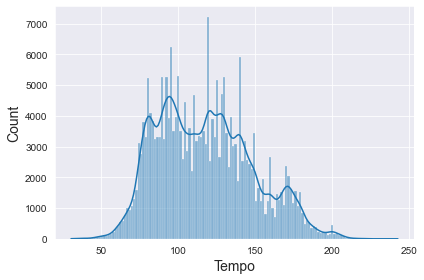

In [177]:
# mean value and histplot for tempo feature
print('Mean value of tempo:', data['tempo'].mean())
sns.histplot(x='tempo', data=data, kde=True)
plt.xlabel('Tempo', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Mean value of duration_ms: 235122.3393060479


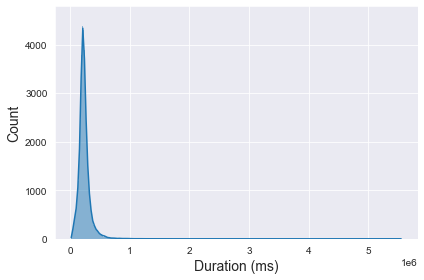

In [178]:
# mean value and histplot for duration_ms feature
print('Mean value of duration_ms:', data['duration_ms'].mean())
sns.histplot(x='duration_ms', data=data, kde=True)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

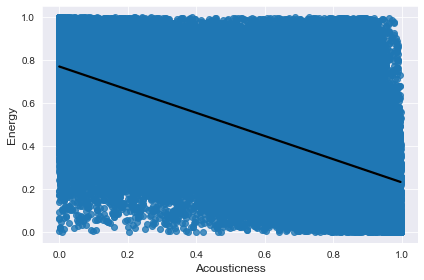

In [181]:
# scatterplot for loudness and energy
# sns.relplot(x='loudness', y='energy', data=df, kind='scatter', height=3.27, aspect=11.7/3.27)
sns.regplot(x='acousticness', y='energy', data=data, line_kws = {'color': 'black'})
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.tight_layout()

### Machine Learning

In [24]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [43]:
data.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [99]:
df = data[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

In [112]:
df.popularity.unique()

array([  0,   1,   3,   4,   2,  15,  10,   8,   5,   6,   7,  11,  65,
        63,  62,  61,  68,  64,  66,  60,  69,  71,  76,  67,  70,  72,
        57,  59,  56,  28,  31,  74,  55,  53,   9,  13,  23,  12,  44,
        33,  25,  26,  24,  22,  20,  19,  18,  16,  17,  14,  83,  81,
        73,  78,  77,  75,  45,  42,  46,  54,  41,  52,  58,  51,  43,
        47,  48,  40,  50,  49,  39,  80,  37,  35,  21,  38,  36,  29,
        34,  32,  99, 100,  97,  92,  91,  95,  90,  93,  88,  87,  89,
        96,  86,  85,  84,  94,  82,  79,  27,  30,  98], dtype=int64)

In [113]:
(data.groupby(by=["artist_name"]).sum()).sort_values(by = 'popularity', ascending = False)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
artist_name,,,,,,,,,,,
Drake,31703,93.260066,316.0960,116141548,266.82000,3.099511,99.6669,-3856.222,113.3354,57529.231,171.6347
Chris Brown,22047,41.894164,251.4070,89377672,238.32800,0.021477,58.4486,-2481.568,44.4065,45572.893,188.2914
Nobuo Uematsu,19710,525.223346,338.5755,166376736,279.79289,601.255151,139.4140,-12039.046,37.1339,98771.076,268.9002
Future,19590,39.376227,240.8530,66704598,179.97300,3.487802,61.3051,-2254.880,69.0511,42430.948,114.0344
Hans Zimmer,19439,329.527433,147.1366,133746520,141.18172,437.113536,90.8699,-10669.538,25.2366,58485.140,59.4124
...,...,...,...,...,...,...,...,...,...,...,...
Bradley Weaver,0,5.598900,7.9840,2338255,7.33600,0.007232,2.4945,-129.749,0.5968,1517.528,10.0570
Laura Doherty,0,0.574000,0.4770,140333,0.30400,0.000000,0.1310,-12.505,0.0310,93.144,0.4010
Tonic Sol-Fa,0,1.032000,2.1190,495240,2.25600,0.000000,0.3769,-19.644,0.2537,324.047,2.8140


In [69]:
X = sample[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
Y = sample[['popularity']]

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(185, 10) (47, 10) (185, 1) (47, 1)


(-1.0, 10.0)

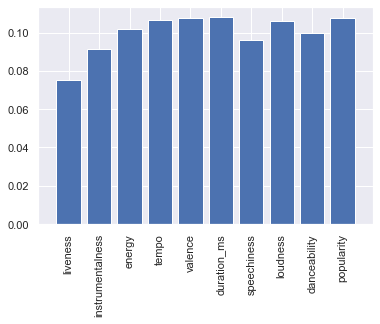

In [103]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, np.ravel(Y_train))
importances = forest.feature_importances_
indices = np.argsort(importance)[::1]
# plt.set_ylable('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
feat_labels = df.columns[1:]
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

In [188]:
X = data.iloc[:, [5,8]].values

In [189]:
print(X)

[[0.611  0.91  ]
 [0.246  0.737 ]
 [0.952  0.131 ]
 ...
 [0.901  0.419 ]
 [0.262  0.704 ]
 [0.0973 0.47  ]]


choosing the number of clusters using WCSS(within clusters sum of squares)

In [190]:
#wcss value for different clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

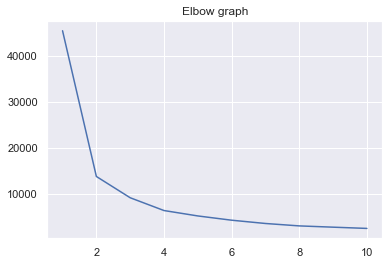

In [191]:
#elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow graph")
plt.show()

Optimal number of clusters according to the graph is 3

#### Training the KMeans model

In [192]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0) 

In [193]:
Y = kmeans.fit_predict(X)
# print(Y)

for i in range(10):
  print(Y[i])

2
1
0
0
0
0
2
0
1
1


#### Visualization of clusters

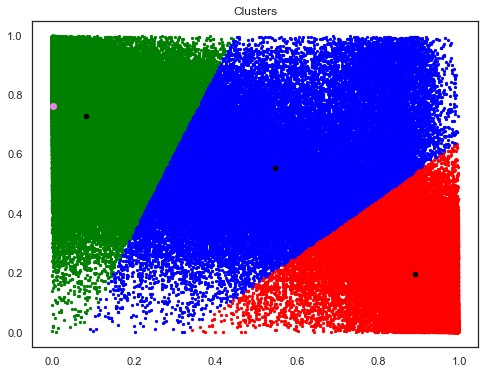

<Figure size 720x432 with 0 Axes>

Red : Cluster 1
Green : Cluster 2
Blue : Cluster 3


In [265]:
plt.figure(figsize=(8,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=5, c='red', label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=5, c='green', label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=5, c='blue', label="Cluster 3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c="black", label='black')

plt.title("Clusters")

print("Red : Cluster 1")
print("Green : Cluster 2")
print("Blue : Cluster 3")

In [195]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [196]:
data.track_name.nunique(dropna = True)

148615

In [197]:
len(data)

232725

In [198]:
df2 = data.copy()
df2.drop_duplicates(subset = "track_name", inplace = True)
df2.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [220]:
rslt_df = df2.sort_values(by = 'popularity', ascending = False)
rslt_df = rslt_df[['genre', 'artist_name', 'track_name']]
rslt_df.head()

,genre,artist_name,track_name
9027,Dance,Ariana Grande,7 rings
86951,Rap,Post Malone,Wow.
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored"
66643,Hip-Hop,Daddy Yankee,Con Calma
9028,Dance,Halsey,Without Me


In [221]:
print("Top 10 most popular songs:\n")
for i in range(10):
#     print(rslt_df[['artist_name', 'track_name']].iloc[i])
    row_list = rslt_df.loc[i, :].values.flatten().tolist()
    print(row_list[1], "-", row_list[2])

# Row_list =[]
# for index, rows in rslt_df.iterrows():
# 	my_list =[rows.artist_name, rows.track_name, rows.genre]
# 	Row_list.append(my_list)

# # Print the list
# print(Row_list)


Top 10 most popular songs:

Henri Salvador - C'est beau de faire un Show
Martin & les fées - Perdu d'avance (par Gad Elmaleh)
Joseph Williams - Don't Let Me Be Lonely Tonight
Henri Salvador - Dis-moi Monsieur Gordon Cooper
Fabien Nataf - Ouverture
Henri Salvador - Le petit souper aux chandelles
Martin & les fées - Premières recherches (par Paul Ventimila, Lorie Pester, Véronique Jannot, Michèle Laroque & Gérard Lenorman)
Laura Mayne - Let Me Let Go
Chorus - Helka
Le Club des Juniors - Les bisous des bisounours


In [201]:
def most_popular(data):
    df2 = data.copy()
    df2.drop_duplicates(subset = "track_name", inplace = True) #dropping duplicate songs
    df2.head()
    
    rslt_df = df2.sort_values(by = 'popularity', ascending = False)
    rslt_df = rslt_df[['genre', 'artist_name', 'track_name']]
    
    print("Top 10 most popular songs:\n")
    for i in range(10):
        row_list = rslt_df.loc[i, :].values.flatten().tolist()
        print(row_list[1], "-", row_list[2])

In [202]:
most_popular(data)

Top 10 most popular songs:

Henri Salvador - C'est beau de faire un Show
Martin & les fées - Perdu d'avance (par Gad Elmaleh)
Joseph Williams - Don't Let Me Be Lonely Tonight
Henri Salvador - Dis-moi Monsieur Gordon Cooper
Fabien Nataf - Ouverture
Henri Salvador - Le petit souper aux chandelles
Martin & les fées - Premières recherches (par Paul Ventimila, Lorie Pester, Véronique Jannot, Michèle Laroque & Gérard Lenorman)
Laura Mayne - Let Me Let Go
Chorus - Helka
Le Club des Juniors - Les bisous des bisounours


### Euclidean Distance

In [205]:
X

array([[0.611 , 0.91  ],
       [0.246 , 0.737 ],
       [0.952 , 0.131 ],
       ...,
       [0.901 , 0.419 ],
       [0.262 , 0.704 ],
       [0.0973, 0.47  ]])

In [223]:
print(Y)
len(Y)

[2 1 0 ... 0 1 1]


232725

In [212]:
A = [[0.000953 , 0.762]]

In [230]:
kmeans.cluster_centers_

array([[0.88995798, 0.19774758],
       [0.08255591, 0.72830688],
       [0.54583484, 0.55472253]])

In [266]:
from scipy.spatial import distance

dist=[]
for i in range(len(kmeans.cluster_centers_)):
    dist.append(distance.euclidean(kmeans.cluster_centers_[i], A))
# print(dist)
num = pd.Series(dist).idxmin()

if(num==0):
    print("Song is in RED cluster")
elif(num==1):
    print("Song is in GREEN cluster")
else:
    print("Song is in BLUE cluster")

[1.0529533007890488, 0.08828511512401069, 0.5829752715587281]
Song is in GREEN cluster


In [256]:
def AddPoint(plot, x, y, color):
    plot.scatter(x, y, c=color)
    plot.figure(figsize=(10,6))
    plot.show()

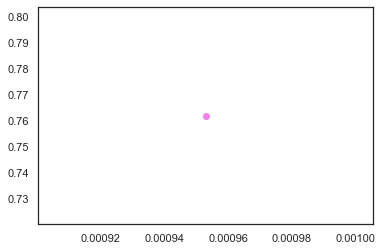

<Figure size 720x432 with 0 Axes>

In [257]:
AddPoint(plt, A[0][0], A[0][1], 'violet')